Nama : Anjas

Nim : 2109106138



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

*Menampilkan Dataset*

In [5]:
dataset_split = pd.read_csv("housing_clean.csv")
dataset_split.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558,219,5.6431,352100,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565,259,3.8462,352100,NEAR BAY


In [3]:
dataset_split.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.046230
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.143926
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105940
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134121
total_bedrooms,0.069259,-0.066658,-0.318998,0.927253,1.000000,0.873909,0.974725,-0.007682,0.049458
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024706
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065851
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.687890
median_house_value,-0.046230,-0.143926,0.105940,0.134121,0.049458,-0.024706,0.065851,0.687890,1.000000


*Preprocessing dataset*t

*Encoding target*

In [7]:
le = LabelEncoder()
dataset_split['median_house_value'] = le.fit_transform(dataset_split['median_house_value'])

In [8]:
# Pilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['population', 'households', 'median_income']
X = dataset_split[selected_features]
y = dataset_split['median_house_value']

*Split dataset menjadi train dan test*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Membuat model sequential*

In [19]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       


                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Callback*

Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Callback untuk menyimpan model terbaik berdasarkan validation loss

In [22]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

*Pelatihan model*

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
207/207 [==============================] - 3s 5ms/step - loss: -24214592.0000 - accuracy: 0.0000e+00 - val_loss: -122305672.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
 60/207 [=======>......................] - ETA: 0s - loss: -227644576.0000 - accuracy: 0.0000e+00

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


207/207 [==============================] - 1s 4ms/step - loss: -985691072.0000 - accuracy: 0.0000e+00 - val_loss: -2879216128.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
207/207 [==============================] - 1s 4ms/step - loss: -8339398656.0000 - accuracy: 0.0000e+00 - val_loss: -17147786240.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
207/207 [==============================] - 1s 3ms/step - loss: -33806155776.0000 - accuracy: 0.0000e+00 - val_loss: -57362190336.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
207/207 [==============================] - 1s 4ms/step - loss: -93340139520.0000 - accuracy: 0.0000e+00 - val_loss: -141164462080.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
207/207 [==============================] - 1s 5ms/step - loss: -204771639296.0000 - accuracy: 0.0000e+00 - val_loss: -287117508608.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
207/207 [==============================] - 1s 5ms/step - loss: -388767973376.0000 - accuracy: 0.0000e+00 - val_loss: -521453961216.0000 

In [18]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

*Evaluasi Model*

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

129/129 [==============================] - 1s 4ms/step - loss: -4215912517337088.0000 - accuracy: 2.4225e-04
Test Loss: -4215912517337088.0000
Test Accuracy: 0.0002


*Dibawah ini adalah grafik perbandingan accuracy dan loss dari train dan test*

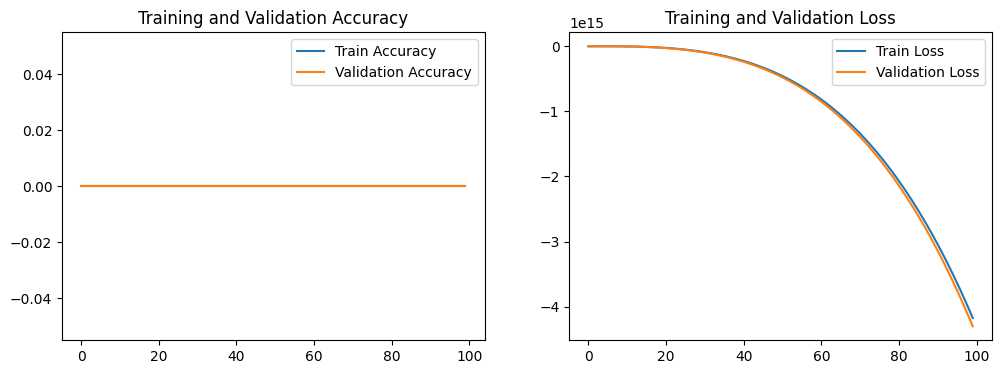

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()